---
title: データフレームの作り方
subject: pandasの使い方
keywords: [python, pandas]
authors:
  - Shota Takahashi
exports:
  - format: pdf  
---

In [29]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# import hvplot.pandas

print(f"Pandas: {pd.__version__}")
# print(f"HvPlot: {hvplot.__version__}")


Pandas: 2.2.2


# 乱数を使ったサンプルデータしたい

- ``x``: ガウス分布
- ``y``: `(4, 8)`の一様分布
- ``y``: `(0, 10)`の整数の一様分布

# 辞書型を変換したい

```python
samples = {
    "x": [リスト],
    "y": [リスト],
    "z": [リスト],
}
```

- リスト型の値をもつ辞書型オブジェクトは、そのまま``pd.DataFrame`` に食べさせることができます。


In [28]:
n = 1000
samples = {
    "x": [random.gauss() for i in range(n)],
    "y": [random.uniform(4, 8) for i in range(n)],
    "z": [random.randint(0, 10) for i in range(n)],
}

data = pd.DataFrame(samples)
data


,x,y,z
0,-0.653217,6.444611,7
1,0.048643,7.846078,3
2,-0.318655,5.071443,9
3,0.038253,7.202256,10
4,-0.794150,7.291447,4
...,...,...,...
995,-1.083232,4.404358,2
996,-0.131713,4.177162,7
997,1.401097,5.586736,9
998,-0.719078,6.109198,8


<Axes: xlabel='z', ylabel='y'>

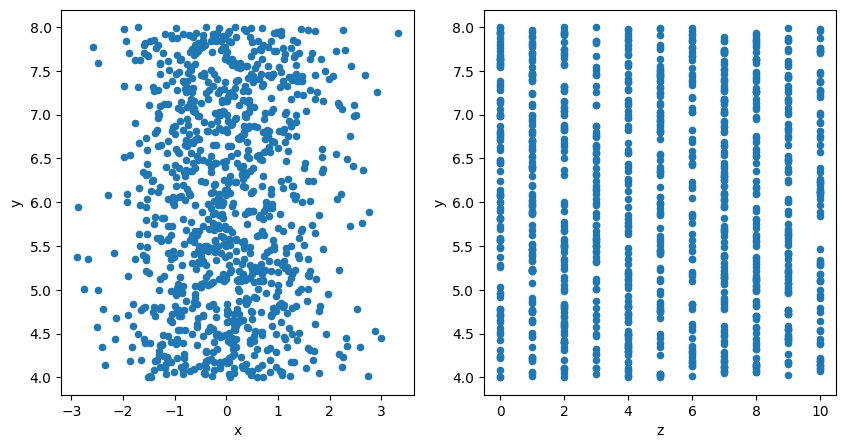

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
canvas = axs.ravel()
data.plot.scatter("x", "y", ax=canvas[0])
data.plot.scatter("z", "y", ax=canvas[1])


# 辞書型リストを変換したい

```python
samples = (
    {"x": 値1, "y": 値1, "z": 値1},
    {"x": 値2, "y": 値2, "z": 値2},
    ...,
    {"x": 値n, "y": 値n, "z": 値n},
)
```

- 辞書型リスト（``list[dict[str, Any]]``）、辞書型タプル（``tuple[dict[str, Any]]``）をデータフレームに変換できます
- 辞書のキーがカラム名になります

In [36]:
samples = (
    {"x": random.gauss(), "y": random.uniform(4, 8), "z": random.randint(0, 10)}
    for i in range(1000)
)

data = pd.DataFrame(samples)
data


,x,y,z
0,-0.501242,4.455190,6
1,0.526664,5.475636,3
2,-0.218135,5.029121,8
3,0.139556,4.555861,8
4,1.749639,6.232548,9
...,...,...,...
995,-1.099292,4.582110,8
996,0.583486,6.030854,9
997,0.369296,4.633384,7
998,0.742911,7.703604,4


# リスト型リストを変換したい

```python
samples = [
    [リスト],    # x列
    [リスト],    # y列
    [リスト],    # z列
]
```

- リスト型リスト（``list[list]``）、タプル型リスト（``list[tuple]``）、リスト型タプル（``tuple[list]``）、タプル型タプル（``tuple[tuple]``）をデータフレームに変換します
- ``columns``オプションを使ってカラム名を変更できます

In [37]:
samples = [
    (random.gauss(), random.uniform(4, 8), random.randint(0, 10)) for i in range(1000)
]
data = pd.DataFrame(samples, columns=["x", "y", "z"])
data


,x,y,z
0,-0.415139,5.334575,10
1,-1.503427,7.857568,10
2,2.263018,7.106282,9
3,0.243278,4.214391,9
4,-0.936980,7.428657,7
...,...,...,...
995,-1.536280,4.061455,9
996,0.285943,6.207940,10
997,-1.081309,5.215355,7
998,-0.016315,7.642381,8
